# Feature computation

In [1]:
example_molecules = [
    'CC1CC2C3CCC4=CC(=O)C=CC4([C@]3(C(CC2([C@]1(C(=O)CCl)O)C)O)F)C',
    'CCCCCCOC(=O)N=C(C1=CC=C(C=C1)NCC2=NC3=C(N2C)C=CC(=C3)C(=O)N(CCC(=O)OCC)C4=CC=CC=N4)N',
    'CSCCC(C(=O)NCC(=O)NC(CC1=CNC2=CC=CC=C21)C(=O)NC(CCSC)C(=O)NC(CC(=O)O)C(=O)NC(CC3=CC=CC=C3)C(=O)N)NC(=O)C(CC4=CC=C(C=C4)OS(=O)(=O)O)NC(=O)C(CC(=O)O)N'
]

len(example_molecules)

3

In [2]:
import numpy as np

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Descriptors, rdFingerprintGenerator

from statsmodels.distributions.empirical_distribution import ECDF

real_200_descr = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207]

In [3]:
len(real_200_descr) 

200

In [4]:
check_list = list(range(208))

print([i for i in check_list if i not in real_200_descr])

[17, 18, 19, 20, 21, 22, 23, 24]


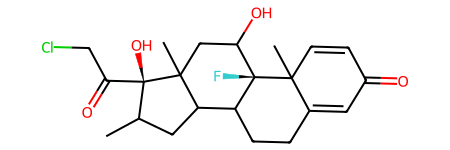

In [5]:
# create mol objects
mols = list()

for smiles in example_molecules:
    mol = Chem.MolFromSmiles(smiles)
    mols.append(mol)
    
mols[0]

In [6]:
# ECFP fingerprints
ecfps = list()

for mol in mols:
    fp_sparseVec = rdFingerprintGenerator.GetCountFPs(
                    [mol], fpType=rdFingerprintGenerator.MorganFP
                   )[0]
    fp = np.zeros((0,), np.int8)  # Generate target pointer to fill
    DataStructs.ConvertToNumpyArray(fp_sparseVec, fp)
    
    ecfps.append(fp)

ecfps = np.array(ecfps)

ecfps.shape

(3, 2048)

In [7]:
# Descriptors
rdkit_descriptors = list()

for i,mol in enumerate(mols):
    descrs = list()
    for descr in Descriptors._descList:
        _, descr_calc_fn = descr
        descrs.append(descr_calc_fn(mol))
        
    descrs = np.array(descrs)
    descrs = descrs[real_200_descr]
    rdkit_descriptors.append(descrs)
    
rdkit_descriptors = np.array(rdkit_descriptors)

rdkit_descriptors.shape

(3, 200)

In [1]:
# report quantils for rdkit descriptors
descriptors_raw_forECDF =  rdkit_descriptors # rdkit descriptors of training set

NameError: name 'rdkit_descriptors' is not defined

In [11]:
import numpy as np
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [12]:
for i in range(a.shape[1]):
    print(a[:,i].reshape(-1))
    print(a[:,i] )
    print(np.all(a[:,i].reshape(-1)  == a[:,i]), "\n")

[0 3 6 9]
[0 3 6 9]
True 

[ 1  4  7 10]
[ 1  4  7 10]
True 

[ 2  5  8 11]
[ 2  5  8 11]
True 



In [9]:
rdkit_descriptors_quantils = np.zeros_like(rdkit_descriptors)

for column in range(descriptors_raw_forECDF.shape[1]):
    raw_values_ecdf = descriptors_raw_forECDF[:,column].reshape(-1)
    raw_values = rdkit_descriptors[:,column]#.reshape(-1)

    ecdf = ECDF(raw_values_ecdf)
    quantils = ecdf(raw_values)
    rdkit_descriptors_quantils[:,column] = quantils

In [11]:
# standardize features

In [19]:
from sklearn.model_selection import train_test_split

In [25]:
a = np.arange(10)

a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
b = np.random.randint(2, size=10)

b

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [28]:
for X,y in zip([X_train,X_val,X_test],[y_train,y_val,y_test]):

    print(f"size: {X.shape , y.shape}\n")
    print(f"array: {X , y}\n")
    

size: ((6,), (6,))

array: (array([4, 8, 6, 1, 3, 7]), array([1, 0, 0, 0, 1, 1]))

size: ((2,), (2,))

array: (array([5, 0]), array([1, 0]))

size: ((2,), (2,))

array: (array([2, 9]), array([1, 0]))

